## 1 - Introduction
Data Storytelling 

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 

Steps:
Ask the following questions and look for the answers using code and plots:
- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import time
from scipy.stats import shapiro
import statsmodels.api as sm
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#%load_ext autoreload
#%autoreload 2

In [180]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'data_2012_2019_rm.csv', low_memory=False, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] )
end = time.time()
print('It takes  ' + str(round((end-start)/60,1)) +' min to read the data')

It takes  36.7 min to read the data


In [181]:
# show missing data
(df.isnull().sum()[df.isnull().sum() >0]/len(df)*100).sort_values(ascending=False)

mths_since_recent_inq    11.503325
emp_length                7.012418
num_tl_120dpd_2m          4.322716
mo_sin_old_il_acct        4.035890
bc_util                   1.375966
                           ...    
mort_acc                  0.273494
total_bal_ex_mort         0.273494
total_bc_limit            0.273494
dti                       0.104057
inq_last_6mths            0.000037
Length: 38, dtype: float64

## 2 - EDA

The dataset was download from [Lending Club](https://www.lendingclub.com/statistics/additional-statistics?). It contains information from 2015 to 2019. 

**Data manipulation**: 

    - Deal with missing value 
    - check each feature
        - observe distribution (normality for particular features)
        - Remove outliner (standard deviation)



In [15]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,hardship_flag,application_type,title,emp_length,sub_grade,verification_status,pymnt_plan,debt_settlement_flag,grade,home_ownership,addr_state,initial_list_status,term,loan_status,purpose,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68367011,2015-12-01,2005-01-01,2018-08-01,2020-01-01,13.99,87.4,N,Individual,Credit card refinancing,< 1 year,C4,Source Verified,n,N,C,RENT,OH,w,60 months,Fully Paid,credit_card,21000.0,21000.0,21000.0,13.99,...,0.0,85.0,0.0,0.0,3.0,3.0,4.0,4.0,11.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,370357.0,372407.0,23300.0,347057.0
68537655,2015-12-01,1997-06-01,2020-01-01,2017-11-01,12.88,24.1,N,Individual,Debt consolidation,10+ years,C2,Not Verified,n,N,C,MORTGAGE,MO,w,60 months,Current,debt_consolidation,16800.0,16800.0,16800.0,12.88,...,4.0,11.0,11.0,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0
68356421,2015-12-01,1995-04-01,2020-01-01,2020-01-01,12.88,32.7,N,Individual,Debt consolidation,6 years,C2,Not Verified,n,N,C,MORTGAGE,SC,w,60 months,Current,debt_consolidation,22400.0,22400.0,22400.0,12.88,...,5.0,1.0,14.0,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0
68466926,2015-12-01,2002-04-01,2018-08-01,2020-01-01,6.49,34.5,N,Individual,Credit card refinancing,6 years,A2,Not Verified,n,N,A,RENT,PA,w,36 months,Fully Paid,credit_card,10000.0,10000.0,10000.0,6.49,...,1.0,4.0,1.0,0.0,6.0,9.0,7.0,10.0,3.0,13.0,19.0,9.0,14.0,0.0,0.0,0.0,2.0,95.7,28.6,1.0,0.0,61099.0,27957.0,16400.0,30799.0
68616873,2015-12-01,1994-11-01,2017-04-01,2018-11-01,11.48,39.1,N,Individual,Credit card refinancing,10+ years,B5,Not Verified,n,N,B,MORTGAGE,RI,w,36 months,Fully Paid,credit_card,8000.0,8000.0,8000.0,11.48,...,1.0,50.0,10.0,1.0,3.0,3.0,3.0,6.0,5.0,5.0,11.0,3.0,8.0,0.0,0.0,0.0,2.0,94.4,33.3,0.0,0.0,256513.0,113782.0,17000.0,135513.0


In [332]:
df.select_dtypes('object').columns

Index(['hardship_flag', 'application_type', 'title', 'emp_length', 'sub_grade',
       'verification_status', 'pymnt_plan', 'debt_settlement_flag', 'grade',
       'home_ownership', 'addr_state', 'initial_list_status', 'term',
       'loan_status', 'purpose'],
      dtype='object')

In [333]:
df.select_dtypes('float').columns

Index(['int_rate', 'revol_util', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate.1', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util.1', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl

In [21]:
df.select_dtypes('datetime').columns.to_list()

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

## 1- Loan status

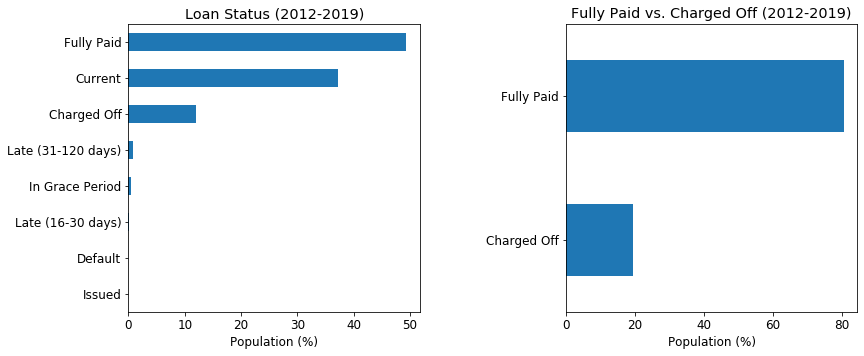

In [366]:
# Look at loan status (2012-2019)
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.rcParams.update({'font.size': 12})
(df['loan_status'].value_counts(normalize=True)*100).sort_values().plot.barh(ax=ax[0])
ax[0].set_xlabel('Population (%)')
ax[0].set_title('Loan Status (2012-2019)')

(df.query("loan_status in ['Fully Paid', 'Charged Off']")['loan_status'].value_counts(normalize=True)*100)\
.sort_values().plot.barh(ax=ax[1])
ax[1].set_xlabel('Population (%)')
ax[1].set_title('Fully Paid vs. Charged Off (2012-2019)')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.5)

- The data is imbalanced. Fully Paid is 80%, whereas Charged off is 20%.
- In the loan status, only fully paid and charged off 



In [288]:
df_time = df[['issue_d','loan_status','term','loan_amnt']]
df_time.set_index('issue_d',inplace=True)
df_time.head() 

,loan_status,term,loan_amnt
issue_d,,,
2013-12-01,Fully Paid,36 months,11100.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,27050.0
2013-12-01,Fully Paid,36 months,12000.0
2013-12-01,Fully Paid,36 months,4800.0


<Figure size 1440x360 with 0 Axes>

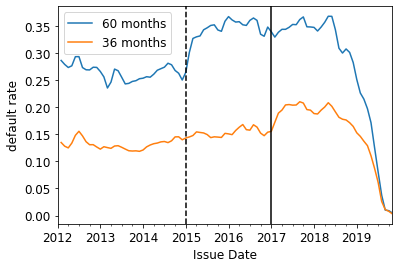

In [357]:
# default rate over years
plt.figure(figsize=(20,5)) 

plt.rcParams.update({'font.size': 12})
df_time_default_60m = df_time.query("loan_status in ['Fully Paid', 'Charged Off'] & term == ' 60 months'")\
.groupby('issue_d')['loan_status'].value_counts(normalize=True).to_frame()
df_time_default_60m.rename(columns={'loan_status':'60 months'}, inplace=True)
df_time_default_60m.reset_index(level=1,inplace=True)
ax = df_time_default_60m.query(" loan_status == 'Charged Off' ").rolling(2).mean().plot(label='60 months')

df_time_default_36m = df_time.query("loan_status in ['Fully Paid', 'Charged Off'] & term == ' 36 months'")\
.groupby('issue_d')['loan_status'].value_counts(normalize=True).to_frame()
df_time_default_36m.rename(columns={'loan_status':'36 months'}, inplace=True)
df_time_default_36m.reset_index(level=1,inplace=True)
df_time_default_36m.query(" loan_status == 'Charged Off' ").rolling(2).mean().plot(label='36 months', ax=ax)

ax.axvline("2017-01-01", color="black", linestyle="-")
ax.axvline("2015-01-01", color="black", linestyle="--")

plt.xlabel('Issue Date')
plt.ylabel('default rate')
plt.legend()
plt.show()

Text(0.5, 1.0, '36 m')

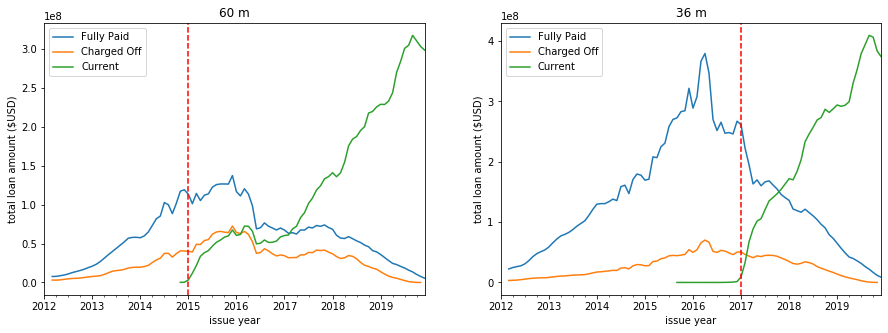

In [331]:

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

plt.rcParams.update({'font.size': 12})

df_time.query(" loan_status == 'Fully Paid' & term == ' 60 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Fully Paid', ax=ax[0])
df_time.query(" loan_status == 'Charged Off' & term == ' 60 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Charged Off', ax=ax[0])
df_time.query(" loan_status == 'Current' & term == ' 60 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Current', ax=ax[0])

ax[0].axvline("2015-01-01", color="red", linestyle="--")
ax[0].legend()
ax[0].set_ylabel('total loan amount ($USD)')
ax[0].set_xlabel('issue year')
ax[0].set_title('60 m')

df_time.query(" loan_status == 'Fully Paid' & term == ' 36 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Fully Paid', ax=ax[1])
df_time.query(" loan_status == 'Charged Off' & term == ' 36 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Charged Off', ax=ax[1])
df_time.query(" loan_status == 'Current' & term == ' 36 months' ")['loan_amnt']\
    .resample('M').sum().rolling(3).mean().plot(label='Current', ax=ax[1])

ax[1].axvline("2017-01-01", color="red", linestyle="--")
ax[1].legend()
ax[1].set_ylabel('total loan amount ($USD)')
ax[1].set_xlabel('issue year')
ax[1].set_title('36 m')


Although there is available information on all the funded loans from 2012 to 2019, only loans
funded until 2017 can be analyzed. It is because the status of later loans (defaulted or non-
defaulted) is still unknown. This happens because the minimum maturity of Lending Club
loans is 36 months. Therefore, for the LC data with 36 months term, we can only analyze the data until 2017. similarly, for the LC data with 60 months term, we can only analze the data until 2015.


In [377]:
# only select either 'Fully Paid' or 'Charged Off' for Target
df_fc = df.query("loan_status in ['Fully Paid', 'Charged Off'] ")
df_fc.shape

(1674326, 91)

In [401]:
# filter years 2012, 2013, 2014
df_fc_1 = df_fc[df_fc['issue_d'].dt.year.isin([2012,2013,2014])]
df_fc_1.shape

(423137, 92)

In [431]:
# check distribution for binary classification
df_fc['loan_status'].value_counts(normalize=True)

Fully Paid     0.804281
Charged Off    0.195719
Name: loan_status, dtype: float64

In [433]:
# fully paid: 0, charged off:1
df_fc['target'] = df_fc['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df_fc['target'].value_counts(normalize=True) 

0    0.804281
1    0.195719
Name: target, dtype: float64

In [462]:
df.query("addr_state == 'IA'").head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,int_rate,revol_util,hardship_flag,application_type,title,emp_length,sub_grade,verification_status,pymnt_plan,debt_settlement_flag,grade,home_ownership,addr_state,initial_list_status,term,loan_status,purpose,loan_amnt,funded_amnt,funded_amnt_inv,int_rate.1,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,region,emp_length_num
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7705836,2013-10-01,2008-03-01,2015-06-01,2016-10-01,15.61,69.1,N,Individual,debt consolidation,< 1 year,C3,Not Verified,n,N,C,MORTGAGE,IA,f,36 months,Charged Off,debt_consolidation,7200.0,7200.0,7200.0,15.61,...,16.0,0.0,0.0,3.0,0.0,0.0,6.0,3.0,6.0,3.0,6.0,0.0,0.0,0.0,1.0,100.0,NaN,0.0,0.0,49146.0,34037.0,0.0,29146.0,midwest,0.0
13006761,2014-03-01,2006-01-01,2016-09-01,2016-10-01,15.61,38.5,N,Individual,Car financing,1 year,C5,Source Verified,n,N,C,RENT,IA,w,36 months,Fully Paid,car,6725.0,6725.0,6725.0,15.61,...,10.0,1.0,4.0,4.0,4.0,6.0,3.0,6.0,9.0,4.0,7.0,0.0,0.0,0.0,2.0,76.9,50.0,0.0,0.0,21883.0,15134.0,2900.0,16483.0,midwest,1.0


IA has the highest default rate, but it only has two data points. We have to remove this, because it is an outlier. 

In [471]:
# remove IA from addr_state
df_fc = df_fc[df_fc['addr_state'] != 'IA']

## 2- Loan Issued by States

In [472]:
states = df_fc['addr_state'].unique()
print(states)
print(len(states))

['NY' 'TX' 'MI' 'NC' 'CT' 'FL' 'CA' 'CO' 'NM' 'MA' 'NJ' 'PA' 'UT' 'SC'
 'OH' 'IN' 'AZ' 'DE' 'KY' 'GA' 'WI' 'IL' 'MO' 'WY' 'TN' 'WA' 'MD' 'VA'
 'MN' 'NH' 'NV' 'KS' 'AL' 'RI' 'OR' 'WV' 'LA' 'VT' 'AR' 'OK' 'HI' 'MT'
 'AK' 'SD' 'DC' 'NE' 'MS' 'ID' 'ME' 'ND']
50


Census Bureau-designated regions and divisions
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States


In [473]:
# Make a list with each of the regions by state.

northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','FL','GA','AZ','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
states_all = northeast + midwest + south + west
assert len(states_all) == 51


In [474]:
# find out which state is missing
set(states_all).difference(set(states))


{'IA'}

According to Lending club website, LC does not accept borrower resident in Iowa.
https://blog.lendingclub.com/is-lending-club-available-in-my-state/


In [475]:
# add region column
df_fc['region'] = np.nan

def finding_regions(state):
    if state in northeast:
        return 'northeast'
    elif state in midwest:
        return 'midwest'
    elif state in south:
        return 'south'
    elif state in west:
        return 'west'
    
df_fc['region'] = df_fc['addr_state'].apply(finding_regions)

In [476]:
df_state_loan_amnt = df_fc.groupby(['region','addr_state'])['loan_amnt'].sum().sort_values(ascending=False).to_frame().reset_index()
df_state_income = df_fc.groupby(['region','addr_state'])['annual_inc'].median().sort_values(ascending=False).to_frame().reset_index()

df_target = df_fc.groupby(['region','addr_state'])['target'].value_counts(normalize=True).to_frame()
df_target = df_target.iloc[df_target.index.get_level_values('target') == 1]\
    .rename(columns={"target": "default_rate"}).reset_index().sort_values(by=["default_rate"], ascending=False)

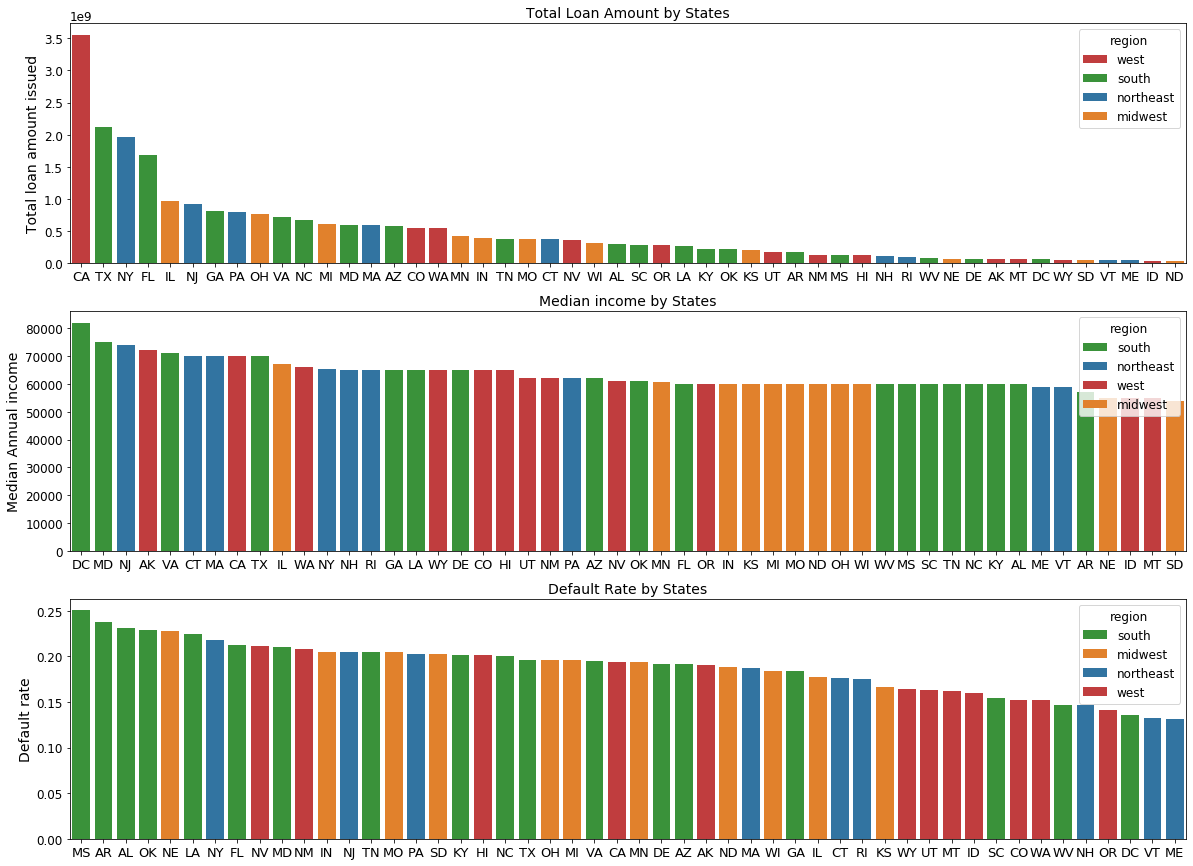

In [478]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20,15))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot('addr_state', 'loan_amnt', hue='region', dodge=False, \
            data=df_state_loan_amnt,ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by States',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('addr_state', 'annual_inc', hue='region',dodge=False, \
            data=df_state_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by States',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('addr_state', 'default_rate', hue='region',dodge=False, \
            data=df_target, ax=ax3,palette=palette)
ax3.set_title('Default Rate by States',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

# adjust font size
for ax in (ax1, ax2, ax3):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)

In [479]:
df_region_loan_amnt = df_fc.groupby(['region'])['loan_amnt'].sum().sort_values(ascending=False).to_frame().reset_index()
df_region_income = df_fc.groupby(['region'])['annual_inc'].median().sort_values(ascending=False).to_frame().reset_index()

df_region_target = df_fc.groupby(['region'])['target'].value_counts(normalize=True).to_frame()
df_region_target = df_region_target.iloc[df_region_target.index.get_level_values('target') == 1]\
    .rename(columns={"target": "default_rate"}).reset_index().sort_values(by=["default_rate"], ascending=False)

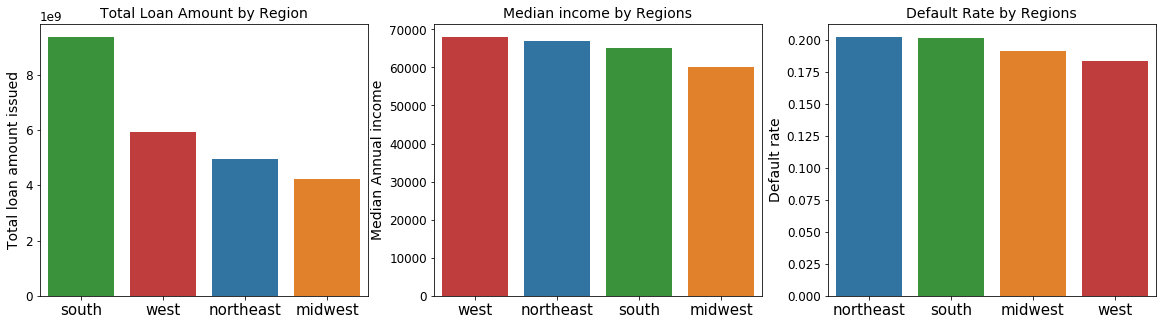

In [485]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20,5))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot(x='region', y='loan_amnt', data=df_region_loan_amnt, ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by Region',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('region', 'annual_inc', data=df_region_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by Regions',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('region', 'default_rate', data=df_region_target , ax=ax3,palette=palette)
ax3.set_title('Default Rate by Regions',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

# adjust font size
for ax in (ax1, ax2, ax3):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)

In [486]:
# join dataframes
df_join = pd.merge(df_state_loan_amnt[['addr_state','loan_amnt']],
                    df_state_income[['addr_state', 'annual_inc']],
                    on='addr_state', how='inner')

df_join = pd.merge(df_join, df_target[['addr_state', 'default_rate']],on='addr_state', how='inner')

In [487]:
df_join = df_join.rename(columns={'addr_state':'state', 'loan_amnt':'loan_amount', 'annual_inc': 'income'})
df_join.head()

,state,loan_amount,income,default_rate
0,CA,3.554573e+09,70000.0,0.194140
1,TX,2.112651e+09,70000.0,0.196030
2,NY,1.967311e+09,65500.0,0.218457
3,FL,1.677667e+09,60000.0,0.212373
4,IL,9.747600e+08,67250.0,0.177545


In [488]:
# round default rate
df_join['default_rate'] = df_join['default_rate'].apply(lambda x: round(x*100, 1))

In [498]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

df_map1=df_join.copy()

# convert to values to string
for col in df_map1.columns:
    df_map1[col] = df_map1[col].astype(str)
    
df_map1['text'] = df_map1['state'] + '<br>' +\
'Mean default rate: ' + df_map1['default_rate'] + ' %' +'<br>'+\
'Median annual income: ' + df_map1['income'] 


data = [ dict(
        type='choropleth',
        colorscale = 'Reds', # discrete color for the map
        autocolorscale = False,
        locations = df_map1['state'],
        z = df_map1['loan_amount'], 
        locationmode = 'USA-states',
        text = df_map1['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$ USD")
        ) ]


layout = dict(
    title = 'Total Issued Loan Amount in USA'+'<br>' +'(2012-2019)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

#### risk analysis

In [450]:
#average_dti	average_emp_length, fico
df_fc.columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'int_rate', 'revol_util', 'hardship_flag', 'application_type', 'title',
       'emp_length', 'sub_grade', 'verification_status', 'pymnt_plan',
       'debt_settlement_flag', 'grade', 'home_ownership', 'addr_state',
       'initial_list_status', 'term', 'loan_status', 'purpose', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'int_rate.1', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util.1',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',


In [490]:
df_fc['fico'] = (df_fc['fico_range_high']+df_fc['fico_range_low'])/2
df_fc['fico'].mean()

698.7766155176656

In [491]:
df_fc['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '2 years', '5 years', '6 years',
       '1 year', '7 years', '8 years', '< 1 year', '9 years', nan],
      dtype=object)

In [492]:
def finding_emp_length(emp_length):
    if emp_length == '< 1 year':
        return 0
    elif emp_length == '1 year':
        return 1
    elif emp_length == '2 years':
        return 2
    elif emp_length == '3 years':
        return 3
    elif emp_length == '4 years':
        return 4
    elif emp_length == '5 years':
        return 5
    elif emp_length == '6 years':
        return 6
    elif emp_length == '7 years':
        return 7
    elif emp_length == '8 years':
        return 8
    elif emp_length == '9 years':
        return 9
    elif emp_length == '10+ years':
        return 10

    
df_fc['emp_length_num'] = df_fc['emp_length'].apply(finding_emp_length)

In [493]:
df_state_emp_length_num = df_fc.groupby(['region','addr_state'])['emp_length_num'].median().sort_values(ascending=False).to_frame().reset_index()
df_state_fico = df_fc.groupby(['region','addr_state'])['fico_range_high'].median().sort_values(ascending=False).to_frame().reset_index()
df_state_dti = df_fc.groupby(['region','addr_state'])['dti'].median().sort_values(ascending=False).to_frame().reset_index()

In [494]:
# join dataframes
df_join_2 = pd.merge(df_state_emp_length_num[['addr_state','emp_length_num']],
                    df_state_fico[['addr_state', 'fico_range_high']],
                     on='addr_state', how='inner')

df_join_2 = pd.merge(df_join_2, df_state_dti[['addr_state', 'dti']],on='addr_state', how='inner')
df_join_2 = pd.merge(df_join_2, df_target[['addr_state', 'default_rate']],on='addr_state', how='inner')

In [495]:
df_join_2 = df_join_2.rename(columns={'addr_state':'state', 'emp_length_num':'employee_length'})
df_join_2.head()

,state,employee_length,fico_range_high,dti,default_rate
0,HI,8.0,689.0,18.925,0.201215
1,DE,7.0,694.0,18.620,0.192154
2,WV,7.0,694.0,19.790,0.147256
3,VT,7.0,694.0,19.695,0.132718
4,RI,7.0,694.0,17.000,0.175020


In [497]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

df_map2=df_join_2.copy()

# convert to values to string
for col in df_map2.columns:
    df_map2[col] = df_map2[col].astype(str)
    
df_map2['text'] = df_map2['state'] + '<br>' +\
'Median Credit Scores: ' + df_map2['fico_range_high'] +'<br>'+\
'Median Debit-to-income: ' + df_map2['dti'] +'<br>'+\
'Median Employee Length: ' + df_map2['employee_length'] +' years'


data = [ dict(
        type='choropleth',
        colorscale = 'Blues', # discrete color for the map
        autocolorscale = False,
        locations = df_map2['state'],
        z = df_map2['default_rate'], 
        locationmode = 'USA-states',
        text = df_map2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Default Rate in USA' +'<br>' + '(2012-2019)' ,
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map-2')

## 3- Credit

Text(0.5, 0, 'grade')

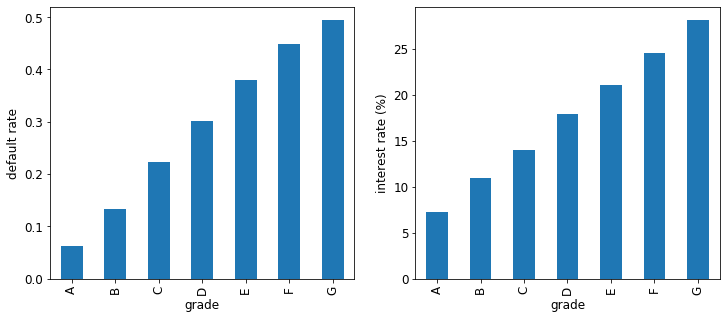

In [514]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
(df_fc.groupby('grade')['target'].sum()/df_fc.groupby('grade')['target'].count()).plot.bar(ax=ax[0])
ax[0].set_ylabel('default rate')
ax[0].set_xlabel('grade')

(df_fc.groupby('grade')['int_rate'].median()).plot.bar(ax=ax[1])
ax[1].set_ylabel('interest rate (%)')
ax[1].set_xlabel('grade')

Text(0, 0.5, 'Average fico')

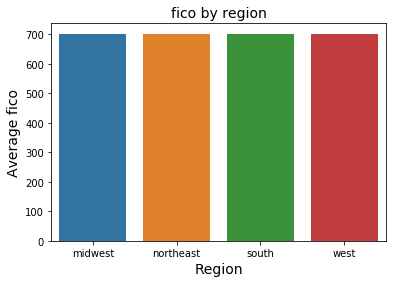

In [40]:
sns.barplot('region', 'fico', data=df)
plt.title('fico by region',fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average fico', fontsize=14)

In [43]:
df.groupby('region')['fico'].mean().sort_values(ascending=True)

region
west         701.033997
south        701.078206
midwest      701.269858
northeast    702.049231
Name: fico, dtype: float64

In [64]:
df.groupby(['region'])['loan_status'].value_counts(normalize=True)#.sort_values(ascending=False)

region     loan_status
midwest    Fully Paid     0.803337
           Charged Off    0.196663
northeast  Fully Paid     0.789714
           Charged Off    0.210286
south      Fully Paid     0.791852
           Charged Off    0.208148
west       Fully Paid     0.809990
           Charged Off    0.190010
Name: loan_status, dtype: float64

In [39]:
df.columns#['addr_state']

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year', 'int_rate',
       'revol_util', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period',
       'log_annual_inc', 'log_dti', 'log_revol_bal', 'delinq_2yrs_str',
       'pub_rec_str', 'fico', 'region'],
      dtype='object')

### 3 maps

In [68]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
import plotly.graph_objs as go


In [71]:
group_loan_amnt = df.groupby('addr_state')['loan_amnt'].sum().sort_values()


In [72]:
group_loan_amnt

addr_state
SD    3.303305e+07
VT    3.312748e+07
ND    3.330028e+07
ID    3.589325e+07
WY    3.664650e+07
          ...     
IL    6.793398e+08
FL    1.176397e+09
NY    1.354495e+09
TX    1.510895e+09
CA    2.474906e+09
Name: loan_amnt, Length: 50, dtype: float64

In [ ]:
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()